# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
skip_to_latest_part = True

In [13]:
import os
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))
test_files = np.array(glob(f'{os.getcwd()}/images/test/*/*'))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))
print('There are %d total test images.' % len(test_files))


There are 13233 total human images.
There are 8351 total dog images.
There are 10 total test images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [14]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

if not skip_to_latest_part:
    # load color (BGR) image
    img = cv2.imread(human_files[0])
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [15]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

if not skip_to_latest_part:
    human_files_short = human_files[:100]
    dog_files_short = dog_files[:100]

    #-#-# Do NOT modify the code above this line. #-#-#

    faces_in_humans = [face_detector(file) for file in tqdm(human_files_short)]
    faces_in_dogs = [face_detector(file) for file in tqdm(dog_files_short)]

    print(f'Percentage of human faces detected in humans: {sum(faces_in_humans)}%')
    print(f'Percentage of human faces detected in dogs: {sum(faces_in_dogs)}%')

100%|██████████| 100/100 [00:29<00:00,  7.05it/s]

Percentage of human faces detected in humans: 98%
Percentage of human faces detected in dogs: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [16]:
import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()
    
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)



# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 81062534.68it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [17]:
from PIL import Image, ImageFile
from torchvision import datasets, transforms as T

ImageFile.LOAD_TRUNCATED_IMAGES = True


normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
image_size = 224
transform = T.Compose([T.Scale(image_size + 32), T.CenterCrop(image_size), T.ToTensor(), normalize])

def preprocess_image(img_path):
    '''
    Args:
        img_path: path to an image
    
    Returns: 
        Correctly formatted and preprocessed image tensor for further processing
    '''
    image = Image.open(img_path)
    image = transform(image).unsqueeze(0)
    # move model to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()
    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path

    Args:
        img_path: path to an image

    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    VGG16.eval()
    predictions = VGG16(preprocess_image(img_path))
    prediction, index = predictions[0].max(0)
    return index.item() # predicted class index

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    predicted_class_index = VGG16_predict(img_path)
    return predicted_class_index > 150 and predicted_class_index < 269 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
if not skip_to_latest_part:
    ### TODO: Test the performance of the dog_detector function
    ### on the images in human_files_short and dog_files_short.
    dogs_in_humans = [dog_detector(file) for file in tqdm(human_files_short)]
    dogs_in_dogs = [dog_detector(file) for file in tqdm(dog_files_short)]

    print(f'Percentage of dogs detected in humans: {sum(dogs_in_humans)}%')
    print(f'Percentage of dogs detected in dogs: {sum(dogs_in_dogs)}%')

100%|██████████| 100/100 [00:04<00:00, 25.43it/s]

Percentage of dogs detected in humans: 0%
Percentage of dogs detected in dogs: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
if not skip_to_latest_part:
    # define Resnet model
    RESNET152 = models.resnet152(pretrained=True)


    # move model to GPU if CUDA is available
    if use_cuda:
        RESNET152 = RESNET152.cuda()

    def resnet152_predict(img_path):
        '''
        Use pre-trained ResNet-152 model to obtain index corresponding to 
        predicted ImageNet class for image at specified path

        Args:
            img_path: path to an image

        Returns:
            Index corresponding to ResNet-152 model's prediction
        '''
        RESNET152.eval()
        predictions = RESNET152(preprocess_image(img_path))
        prediction, index = predictions[0].max(0)
        return index.item() # predicted class index

    ### returns "True" if a dog is detected in the image stored at img_path
    def resnet_dog_detector(img_path):
        predicted_class_index = resnet152_predict(img_path)
        return predicted_class_index > 150 and predicted_class_index < 269 # true/false

    dogs_in_humans = [resnet_dog_detector(file) for file in tqdm(human_files_short)]
    dogs_in_dogs = [resnet_dog_detector(file) for file in tqdm(dog_files_short)]

    print(f'Percentage of dogs detected in humans: {sum(dogs_in_humans)}%')
    print(f'Percentage of dogs detected in dogs: {sum(dogs_in_dogs)}%')

100%|██████████| 100/100 [00:06<00:00, 16.96it/s]

Percentage of dogs detected in humans: 0%
Percentage of dogs detected in dogs: 99%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import os
from torchvision import datasets

image_size = 128
batch_size = 32

augmentations = [
    T.RandomRotation(20),
    T.RandomHorizontalFlip()
]
data_handling = [
    T.Scale(image_size + 16), 
    T.CenterCrop(image_size), 
    T.ToTensor(), 
    normalize
]

train_transform = T.Compose(augmentations + data_handling)

test_transform = T.Compose(data_handling)

train_dataset = datasets.ImageFolder('/data/dog_images/train/', transform=train_transform)
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = datasets.ImageFolder('/data/dog_images/valid/', transform=test_transform)
validation_data_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.ImageFolder('/data/dog_images/test/', transform=test_transform)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

loaders_scratch = {'train': train_data_loader, 'valid': validation_data_loader, 'test': test_data_loader}

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- I also chose a smaller picture size (128 x 128) for my network to have faster training. My first intuition was to just go with the same sizes as VGG16 (224 x 224), however I found that smaller images also suffice and increase performance (speed). I resized and cropped the images similarly to the previous VGG16 transformations (just smaller).
- I decided to augment the training dataset through random rotations of up to 20 degrees (covering slightly rotated cameras during picture taking process) and random horizontal flips. Any other transform seems to likely add complexity to the model (e.g. vertical flips), although one might add different scaling factors to cover pictures of dogs from different distances. The validation and test datasets, I simply adjusted so that the network could process it (ergo no augmentation) to avoid evaluation of a model biased in its data preprocessing.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F
num_classes = 133

In [21]:
def calculate_output_dimensions(old_dim=224, kernel_size=3, padding=0, stride=1):
    '''
    Helper method to calculate output (square) output dimension of a convolution
    '''
    return ((old_dim - kernel_size + 2 * padding) / stride) + 1

In [22]:
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d( 3, 16, kernel_size=(3, 3), padding=1),   #  3 x 128 x 128 -> 16 x 128 x 128
            nn.Dropout2d(0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(4, 4), stride=4),         # 16 x 128 x 128 -> 16 x  32 x  32
            nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1),   # 16 x  32 x  32 -> 32 x  32 x  32
            nn.Dropout2d(0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),         # 32 x  32 x  32 -> 32 x  16 x  16
            nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1),   # 32 x  16 x  16 -> 64 x  16 x  16
            nn.Dropout2d(0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)          # 64 x  16 x  16 -> 64 x   8 x   8
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 8 * 8, 1024),                        # 4096  (64x8x8) ->           1024
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(1024, 256),                               #           1024 ->            256
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(256, num_classes)                         #            256 ->            133
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- I started out way to big and waisted a couple of hours to be honest.
- Then I found a bug (I had forgotten to clear the gradients of the optimizer).
- Now the real work began:
  - Similar to previous models and the VGG16 model, I've created two parts of my network: a feature detector and a classifier
  - The feature detector consists of multiple repetitions of a similar architecture:
    - a convolutional layer (to increase depth and detect features)
    - dropout (I chose small values for the convolutional dropout in line with what I found online)
    - an activation function (I chose ReLU for this part)
    - a max pool layer (scale factor of 4 in the first repetition for faster complexity reduction and 2 in the second and third repetitions to avoid too much information loss in the higher level features)
  - The classifier consists of three repetitions of 
    - decreasingly complex (wide) linear layers 
    - and again the ReLU activation function (except for the last layer, because I chose CrossEntropy as my loss function)
    - dropout with 50% dropout probability (except for the last layer, because I want all outputs - I'm not sure whether this makes sense though, because dropout should only be used during training)
    
On a side note: I found the sequential model definition while doing some research and I find it much more intuitive. It allows for a much easier grasp of the exact architecture at the cost of repetition (cf. dropout layers), but adds easier management of dimensionality (see comments) and a much more straight forward definition of the forward pass. I'd like to encourage you to use this format for future classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
# somehow the import from the external py file did not work, properly and I'd rather just quickly added the code here.

import signal

from contextlib import contextmanager

import requests


DELAY = INTERVAL = 4 * 60  # interval time in seconds
MIN_DELAY = MIN_INTERVAL = 2 * 60
KEEPALIVE_URL = "https://nebula.udacity.com/api/v1/remote/keep-alive"
TOKEN_URL = "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token"
TOKEN_HEADERS = {"Metadata-Flavor":"Google"}


def _request_handler(headers):
    def _handler(signum, frame):
        requests.request("POST", KEEPALIVE_URL, headers=headers)
    return _handler


@contextmanager
def active_session(delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import active session

    with active_session():
        # do long-running work here
    """
    token = requests.request("GET", TOKEN_URL, headers=TOKEN_HEADERS).text
    headers = {'Authorization': "STAR " + token}
    delay = max(delay, MIN_DELAY)
    interval = max(interval, MIN_INTERVAL)
    original_handler = signal.getsignal(signal.SIGALRM)
    try:
        signal.signal(signal.SIGALRM, _request_handler(headers))
        signal.setitimer(signal.ITIMER_REAL, delay, interval)
        yield
    finally:
        signal.signal(signal.SIGALRM, original_handler)
        signal.setitimer(signal.ITIMER_REAL, 0)


In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        
        progress_bar = tqdm(loaders['train'])
        progress_bar.set_description('Training')
        for batch_idx, (data, target) in enumerate(progress_bar):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            prediction = model(data)
            loss = criterion(prediction, target)
            loss.backward()
            optimizer.step()
            # record the average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        progress_bar.close()
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        progress_bar = tqdm(loaders['valid'])
        progress_bar.set_description('Validation')
        for batch_idx, (data, target) in enumerate(progress_bar):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            prediction = model(data)
            loss = criterion(prediction, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        progress_bar.close()

        # print training/validation statistics 
        print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f}')
        
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model, save_path)
            print('saving model...')
            
    # return trained model
    return model

if not skip_to_latest_part:
    # train the model

    with active_session():
        # do long-running work here
        model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                              criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch = torch.load('model_scratch.pt')

Validation: 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 4.884081 	Validation Loss: 4.881769
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 4.831674 	Validation Loss: 4.692321
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 4.634233 	Validation Loss: 4.486129
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 4.462705 	Validation Loss: 4.354019
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 4.353063 	Validation Loss: 4.241605
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 4.277604 	Validation Loss: 4.185185
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 4.221702 	Validation Loss: 4.137069
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 4.156292 	Validation Loss: 4.109751
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 4.108424 	Validation Loss: 4.076043
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 4.059542 	Validation Loss: 4.015247
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 4.011968 	Validation Loss: 3.982887
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 3.957591 	Validation Loss: 4.022655


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 3.932657 	Validation Loss: 3.927740
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 3.883880 	Validation Loss: 3.911187
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 3.859242 	Validation Loss: 3.892032
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 3.815234 	Validation Loss: 3.891659
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 3.779183 	Validation Loss: 3.807335
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 3.752534 	Validation Loss: 3.814640


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 3.734921 	Validation Loss: 3.874121


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 20 	Training Loss: 3.717535 	Validation Loss: 3.796636
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 21 	Training Loss: 3.651677 	Validation Loss: 3.812332


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 22 	Training Loss: 3.633589 	Validation Loss: 3.796395
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 23 	Training Loss: 3.584334 	Validation Loss: 3.732403
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 24 	Training Loss: 3.567645 	Validation Loss: 3.721328
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 25 	Training Loss: 3.550557 	Validation Loss: 3.765645


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 26 	Training Loss: 3.532444 	Validation Loss: 3.662114
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 27 	Training Loss: 3.495661 	Validation Loss: 3.678989


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 28 	Training Loss: 3.462312 	Validation Loss: 3.699965


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 29 	Training Loss: 3.435822 	Validation Loss: 3.676214


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 30 	Training Loss: 3.404337 	Validation Loss: 3.602574
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 31 	Training Loss: 3.404702 	Validation Loss: 3.659705


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 32 	Training Loss: 3.383591 	Validation Loss: 3.616496


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 33 	Training Loss: 3.329300 	Validation Loss: 3.661103


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 34 	Training Loss: 3.320147 	Validation Loss: 3.671303


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 35 	Training Loss: 3.304391 	Validation Loss: 3.589020
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 36 	Training Loss: 3.250421 	Validation Loss: 3.613947


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 37 	Training Loss: 3.252913 	Validation Loss: 3.635272


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 38 	Training Loss: 3.206902 	Validation Loss: 3.577213
saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 39 	Training Loss: 3.221664 	Validation Loss: 3.636038


Validation: 100%|██████████| 27/27 [00:08<00:00,  3.08it/s]

Epoch: 40 	Training Loss: 3.186315 	Validation Loss: 3.598044


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(tqdm(loaders['test'])):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

if not skip_to_latest_part:
    # call test function    
    test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

100%|██████████| 27/27 [00:09<00:00,  2.94it/s]

Test Loss: 3.641806


Test Accuracy: 15% (133/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
image_size = 224
batch_size = 32

augmentations = [
    T.RandomRotation(20),
    T.RandomHorizontalFlip()
]
data_handling = [
    T.Scale(image_size + 16), 
    T.CenterCrop(image_size), 
    T.ToTensor(), 
    normalize
]

train_transform = T.Compose(augmentations + data_handling)

test_transform = T.Compose(data_handling)

train_dataset = datasets.ImageFolder('/data/dog_images/train/', transform=train_transform)
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = datasets.ImageFolder('/data/dog_images/valid/', transform=test_transform)
validation_data_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.ImageFolder('/data/dog_images/test/', transform=test_transform)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

loaders_transfer = {'train': train_data_loader, 'valid': validation_data_loader, 'test': test_data_loader}

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.features.parameters():
    param.requires_grad = False
model_transfer.classifier[6] = nn.Linear(4096, num_classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- I chose to use the pretrained VGG16 model, because it already showed great capabilities in detecting dogs above. 
- I froze all weights of the feature extractor part in order to avoid overfitting to my dataset. Also, the feature extractor should be fairly good after being trained on imagenet.
- I altered it have the correct number of outputs in the final layer of the classifier (reduction from 1000 to 133).
- I basically chose my transformations from above for the same reasons, but used the required imagesize for VGG16 of 224 x 224.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
if not skip_to_latest_part:
    # train the model
    with active_session():
        model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

    # load the model that got the best validation accuracy (uncomment the line below)
    model_transfer = torch.load('model_transfer.pt')

Validation: 100%|██████████| 27/27 [00:12<00:00,  2.25it/s]


Epoch: 1 	Training Loss: 3.745590 	Validation Loss: 1.717860


  0%|          | 0/209 [00:00<?, ?it/s]

saving model...


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.19it/s]


Epoch: 2 	Training Loss: 3.017069 	Validation Loss: 1.507715


  0%|          | 0/209 [00:00<?, ?it/s]

saving model...


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 2.856348 	Validation Loss: 1.509974


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.22it/s]


Epoch: 4 	Training Loss: 2.776909 	Validation Loss: 1.324665


  0%|          | 0/209 [00:00<?, ?it/s]

saving model...


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]


Epoch: 5 	Training Loss: 2.669636 	Validation Loss: 1.278086


  0%|          | 0/209 [00:00<?, ?it/s]

saving model...
Epoch: 6 	Training Loss: 2.558016 	Validation Loss: 1.365262


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.15it/s]


Epoch: 7 	Training Loss: 2.467866 	Validation Loss: 1.219907


  0%|          | 0/209 [00:00<?, ?it/s]

saving model...
Epoch: 8 	Training Loss: 2.491400 	Validation Loss: 1.450463


  0%|          | 0/209 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 2.411142 	Validation Loss: 1.396393


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.23it/s]


Epoch: 10 	Training Loss: 2.457158 	Validation Loss: 1.290626


In [28]:
model_transfer = torch.load('model_transfer.pt')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
if not skip_to_latest_part:
    test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

100%|██████████| 27/27 [00:21<00:00,  1.65it/s]

Test Loss: 1.276577


Test Accuracy: 64% (537/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    predictions = model_transfer(preprocess_image(img_path))
    prediction, index = predictions[0].max(0)
    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, color_profile=None):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    
    if color_profile == 'RGB':
        print('Converting color profile')
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    plt.imshow(img)
    plt.show()

    if dog_detector(img_path):
        print(f'That looks like a dog to me.')
        breed = predict_breed_transfer(img_path)
        print(f'Like a {breed}.')
    elif face_detector(img_path):
        print(f'That looks like a human to me.')
        breed = predict_breed_transfer(img_path)
        print(f'However, it kind of looks like a {breed}.')
    else:
        print(f'That doesn\'t look right. Are you sure, there\'s an image of either a dog or a human at {img_path}?')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
- The app performs better than expected on the few sample images.
- It could be improved by at least the following points:
    - Additional Functionality:
        - Add detection output similar to the very first face detection example for detected faces (humans) or dogs.
        - Add additional regions of interest view that highlight the most important regions for the classification.
        - One could experiment with adding several feature map visualizations next to the image for better transparency.
        - Give some form of confidence score for classifications.
        - If some classes are similarly likely (e.g. for Brittany and a Welsh Springer Spaniel), one could also give those as alternatives.
    - Improved performance:
        - Spend more time on training for better predictions.
        - Spend more time on optimization for smaller models and faster predictions.

Converting color profile


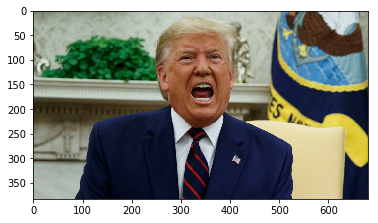

That looks like a human to me.
However, it kind of looks like a Italian greyhound.
Converting color profile


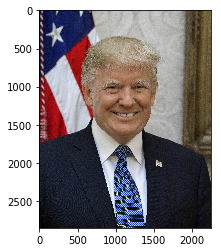

That looks like a human to me.
However, it kind of looks like a Italian greyhound.
Converting color profile


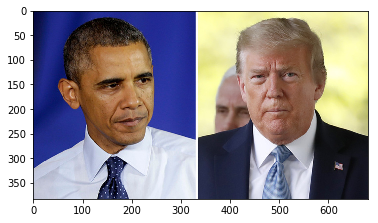

That looks like a human to me.
However, it kind of looks like a Italian greyhound.
Converting color profile


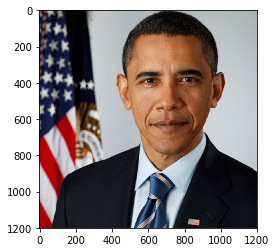

That looks like a human to me.
However, it kind of looks like a Italian greyhound.
Converting color profile


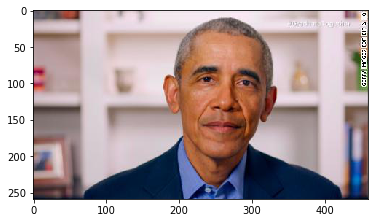

That looks like a human to me.
However, it kind of looks like a Dachshund.
Converting color profile


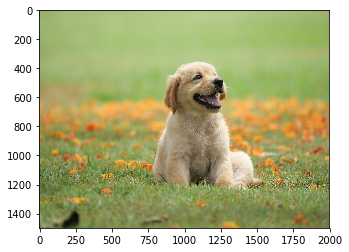

That looks like a dog to me.
Like a Golden retriever.
Converting color profile


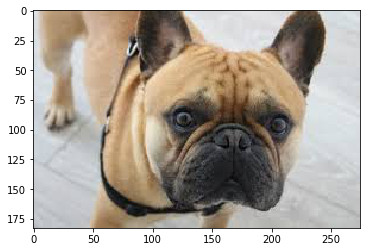

That looks like a dog to me.
Like a Bullmastiff.
Converting color profile


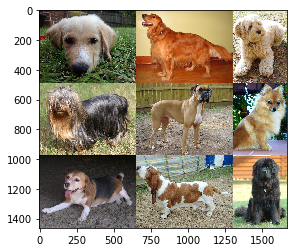

That looks like a dog to me.
Like a Dachshund.
Converting color profile


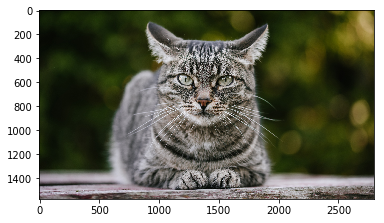

That looks like a human to me.
However, it kind of looks like a Belgian tervuren.
Converting color profile


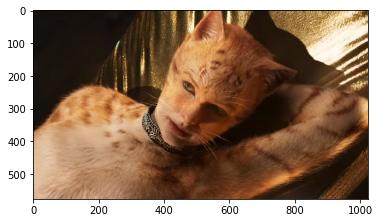

That doesn't look right. Are you sure, there's an image of either a dog or a human at /home/workspace/dog_project/images/test/other/cat2.jpg?


In [39]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((test_files)):
    run_app(file, 'RGB')